# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'USDCHF'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

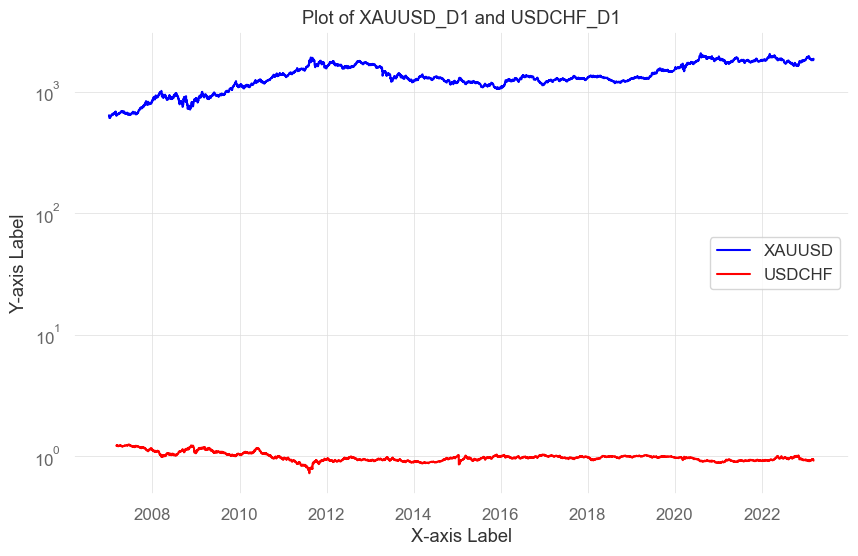

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          5.023e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:41:47   Log-Likelihood:                         -37360.
No. Observations:                5011   AIC:                                  7.472e+04
Df Residuals:                    5010   BIC:                                  7.473e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1343.0860      5.993    224.111      0.000    1331.337    1354.835
==============================================================================
Omnibus:                      157.503   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.950
Skew:                          -0.416   Prob(JB):                     6.81e-36
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Save Result Backtest 

In [12]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [13]:
filename = f'{Currency_Pair}_{TF}.csv'

In [14]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -37.77%

Sharpe                     -1.27
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.08
Sortino                    -1.37
Smart Sortino              -1.16
Sortino/√2                 -0.97
Smart Sortino/√2           -0.82
Omega                      0.7

Max Drawdown               -100.0%
Longest DD Days            5849
Volatility (ann.)          37.41%
Calmar                     -0.38
Skew                       -6.3
Kurtosis                   55.71

Expected Daily %           -0.22%
Expected Monthly %         -5.54%
Expected Yearly %          -47.67%
Kelly Criterion            -21.23%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.06%
Expected Shortfall (cVaR)  -4.06%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-06,2019-06-19,2023-03-10,5849,-99.998834,-99.99875


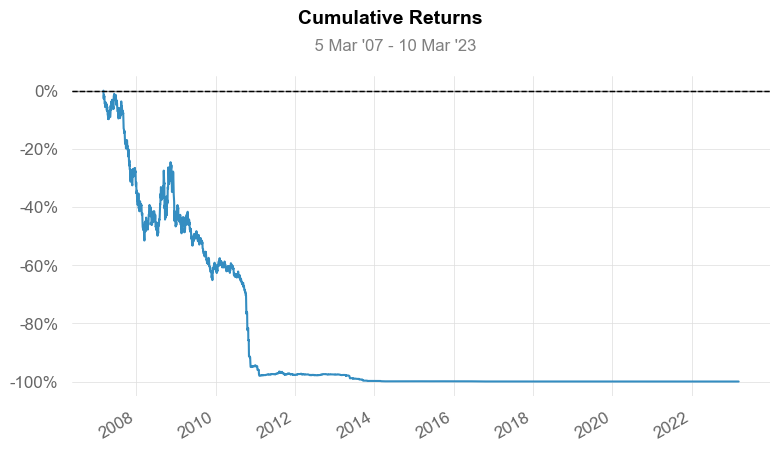

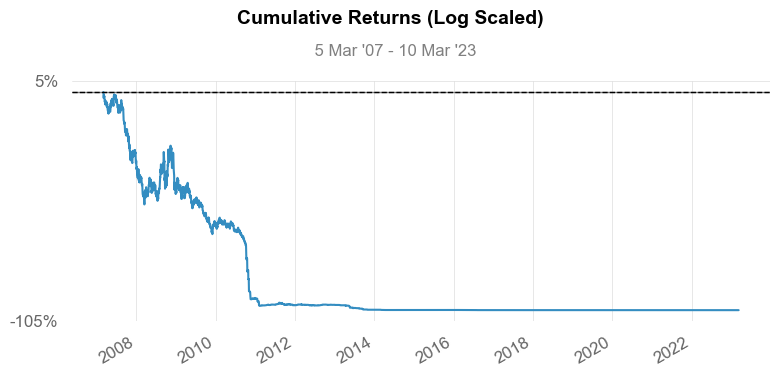

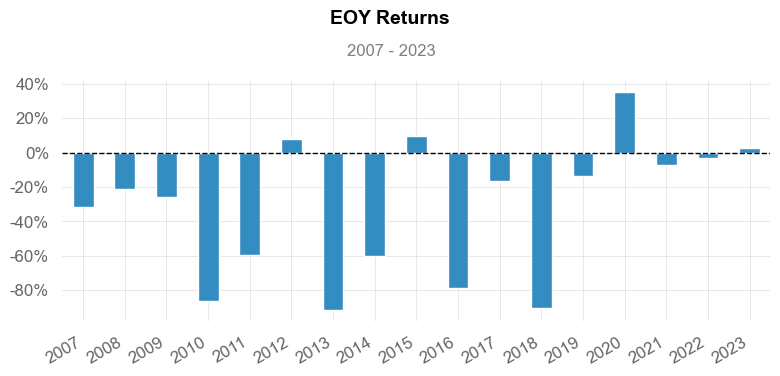

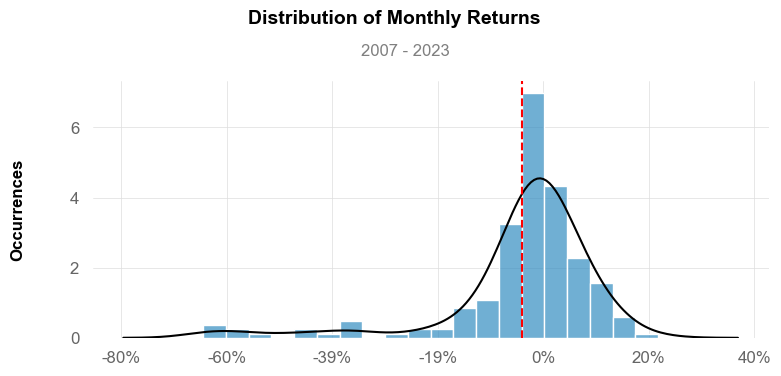

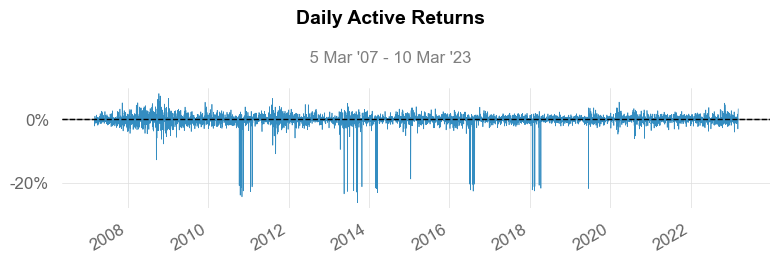

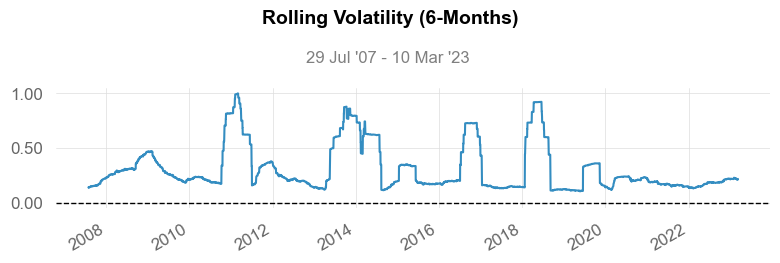

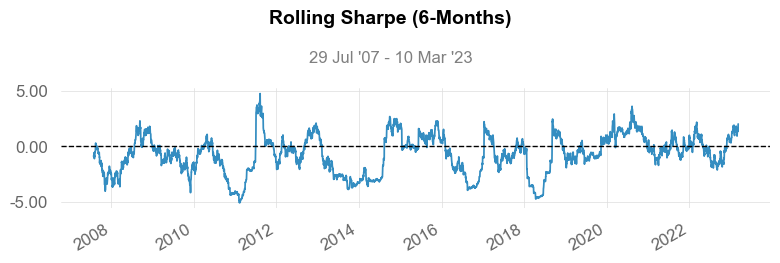

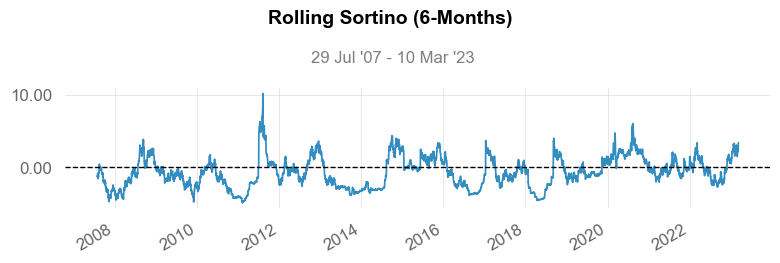

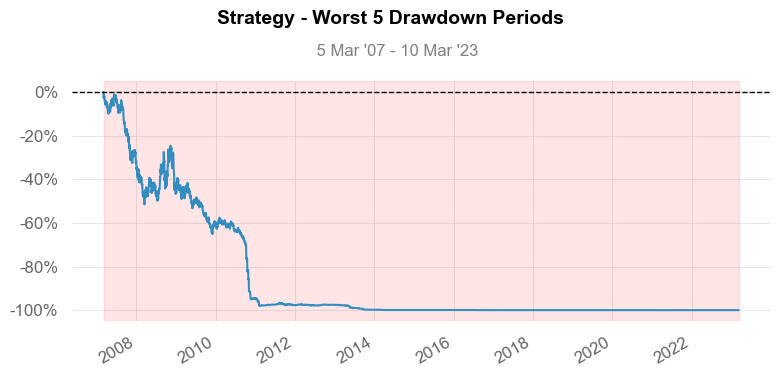

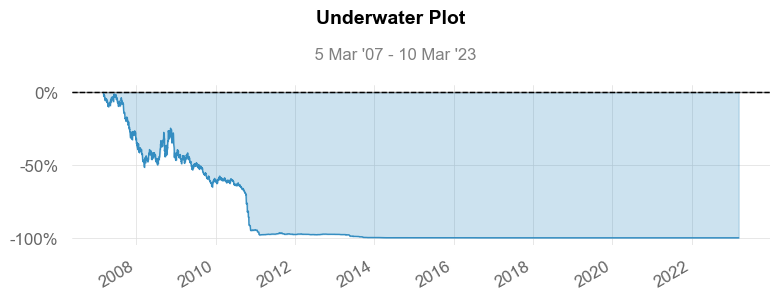

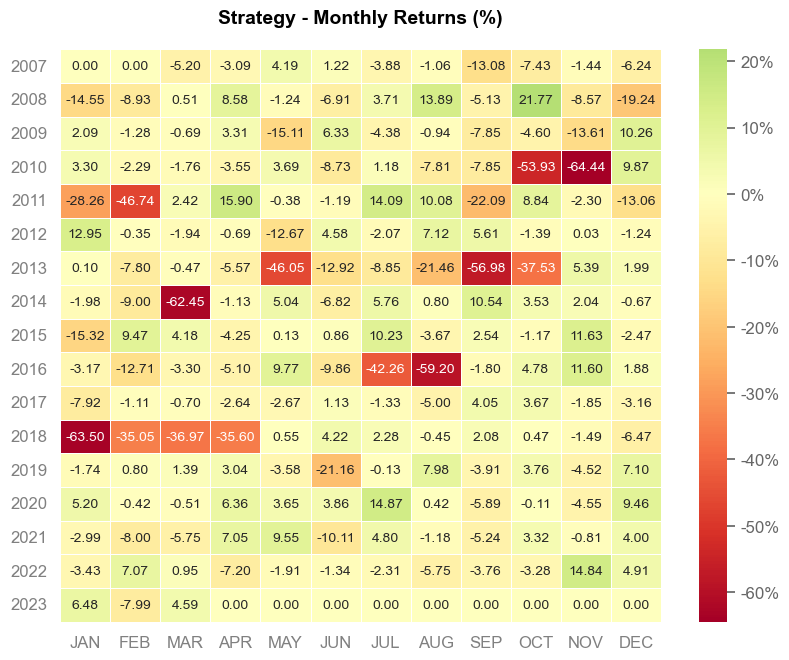

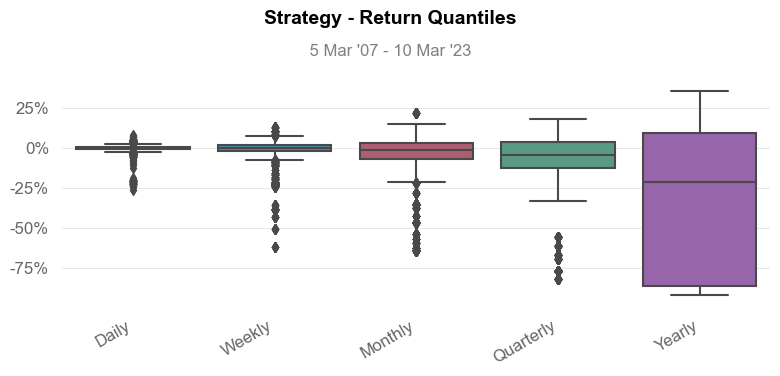

In [15]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [16]:
TF = 'H4'

In [17]:
data_1 = XAUUSD[TF]

In [18]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

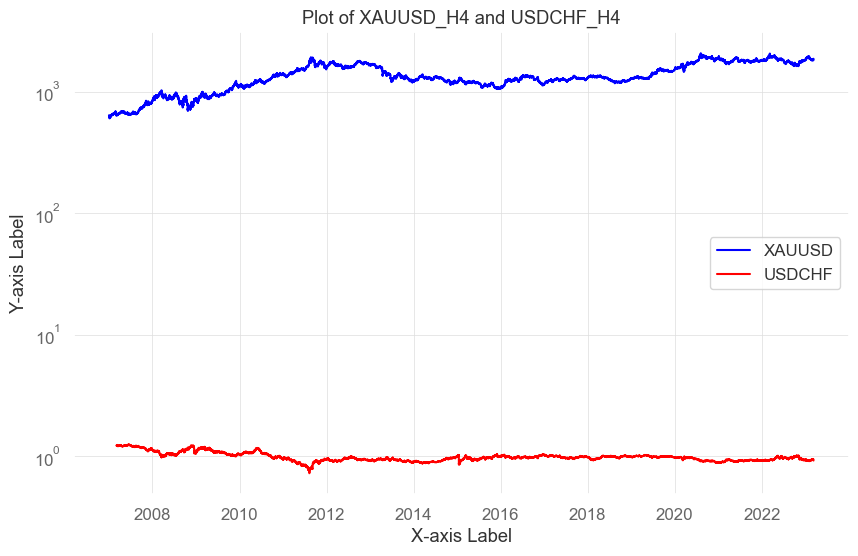

In [19]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [20]:
KF = Kalman_Filter(data_1, data_2)

In [21]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.587e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:43:23   Log-Likelihood:                     -1.9272e+05
No. Observations:               25846   AIC:                                  3.854e+05
Df Residuals:                   25845   BIC:                                  3.854e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.5244      2.640    508.594      0.000    1337.351    1347.698
==============================================================================
Omnibus:                      817.100   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.683
Skew:                          -0.417   Prob(JB):                    4.63e-183
Kurtosis:                       2.709   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result = KF.Run()

### Save Result Backtest 

In [23]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [24]:
filename = f'{Currency_Pair}_{TF}.csv'

In [25]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -97.7%
CAGR﹪                     -15.0%

Sharpe                     -0.93
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.83
Sortino                    -0.95
Smart Sortino              -0.85
Sortino/√2                 -0.67
Smart Sortino/√2           -0.6
Omega                      0.58

Max Drawdown               -98.36%
Longest DD Days            5842
Volatility (ann.)          18.24%
Calmar                     -0.15
Skew                       -16.22
Kurtosis                   282.28

Expected Daily %           -0.08%
Expected Monthly %         -1.94%
Expected Yearly %          -19.9%
Kelly Criterion            -35.57%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.96%
Expected Shortfall (cVaR)  -1.96%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-03-13,2019-06-02,2023-03-10,5842,-98.361739,-98.329474
2,2007-03-06,2007-03-06,2007-03-06,1,-0.282251,NaN
3,2007-03-08,2007-03-11,2007-03-11,4,-0.228071,-0.110577


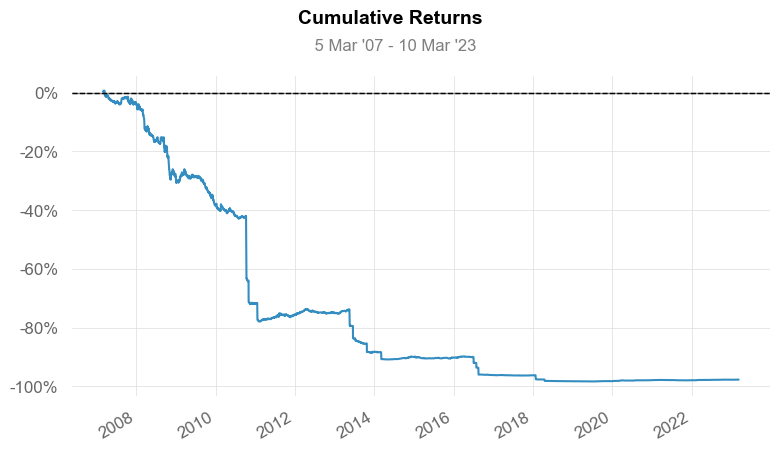

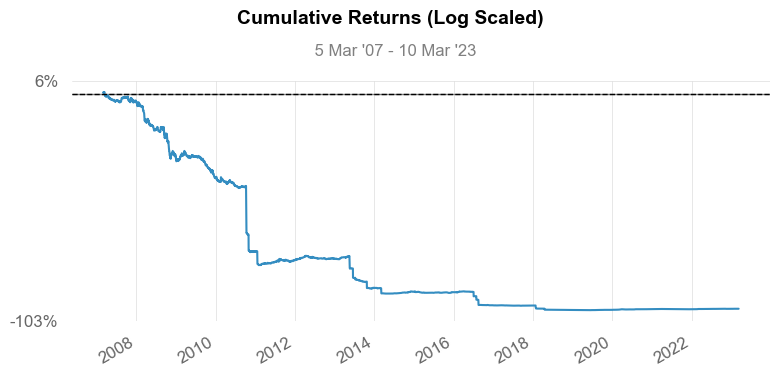

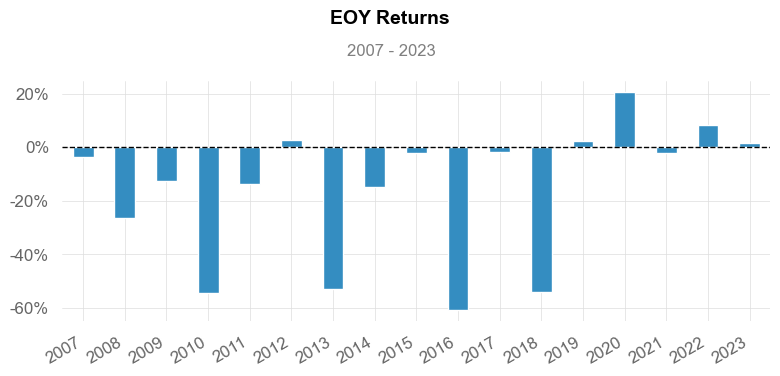

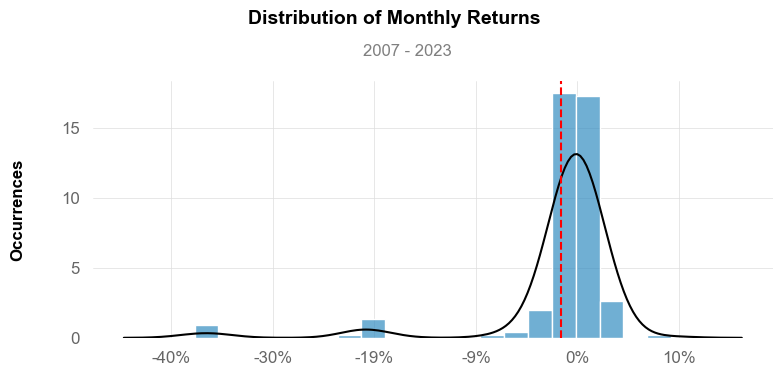

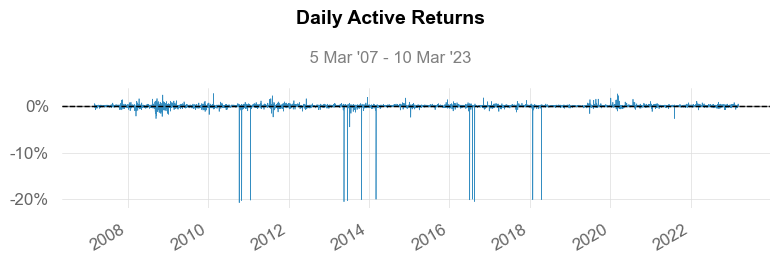

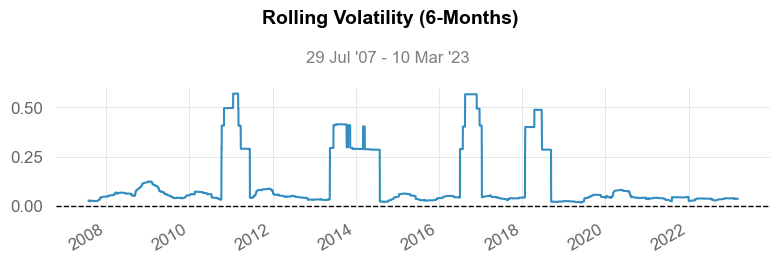

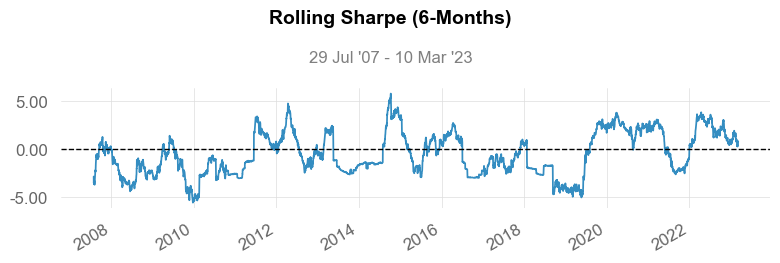

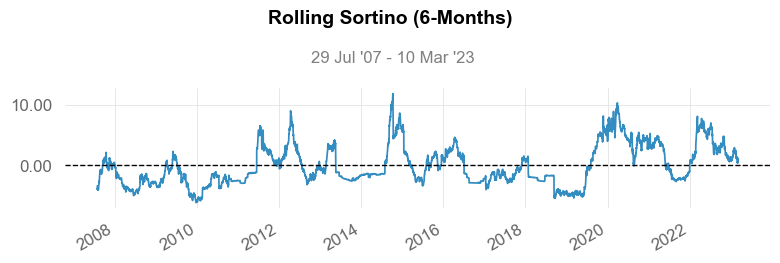

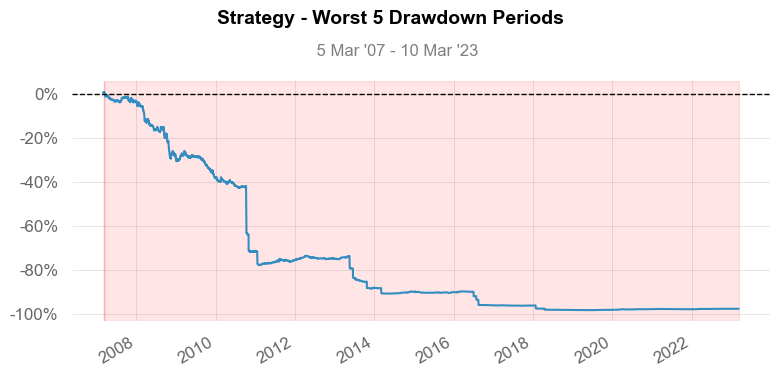

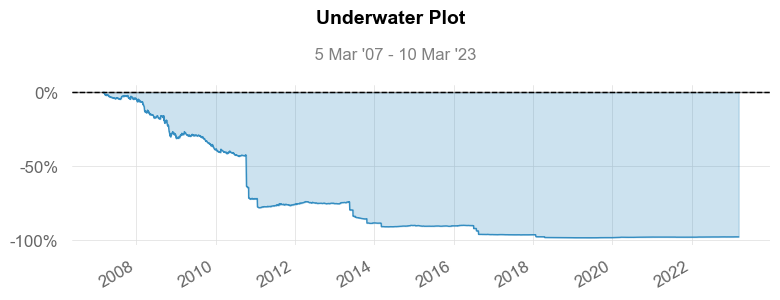

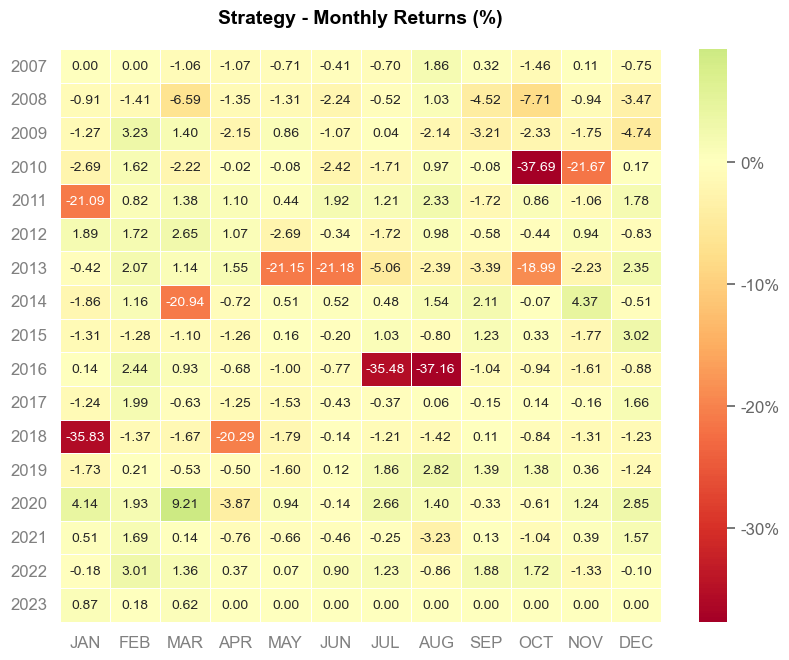

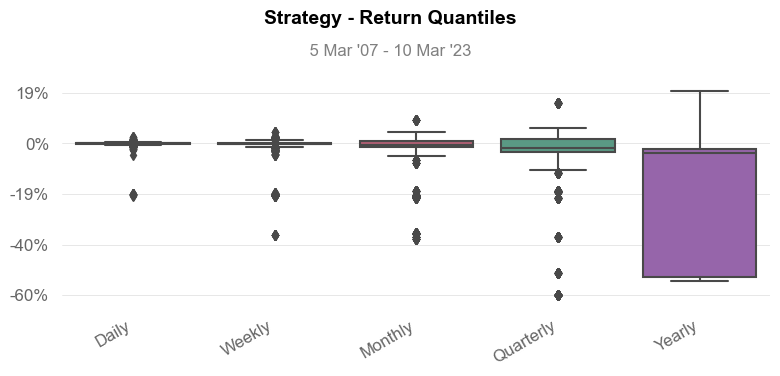

In [26]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [27]:
TF = 'H1'

In [28]:
data_1 = XAUUSD[TF]

In [29]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

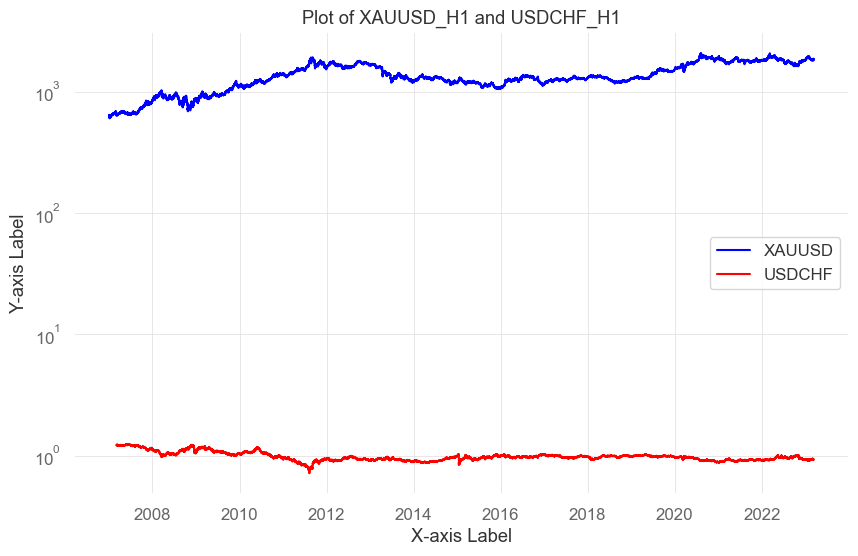

In [30]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [31]:
KF = Kalman_Filter(data_1, data_2)

In [32]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          1.001e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:48:09   Log-Likelihood:                     -7.4573e+05
No. Observations:              100012   AIC:                                  1.491e+06
Df Residuals:                  100011   BIC:                                  1.491e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.4023      1.342   1000.254      0.000    1339.772    1345.033
==============================================================================
Omnibus:                     3165.145   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3251.227
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       2.709   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = KF.Run()

### Save Result Backtest 

In [34]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [35]:
filename = f'{Currency_Pair}_{TF}.csv'

In [36]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -77.35%
CAGR﹪                     -6.2%

Sharpe                     -0.58
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.5
Sortino                    -0.6
Smart Sortino              -0.51
Sortino/√2                 -0.42
Smart Sortino/√2           -0.36
Omega                      0.7

Max Drawdown               -83.72%
Longest DD Days            5594
Volatility (ann.)          11.48%
Calmar                     -0.07
Skew                       -25.71
Kurtosis                   712.46

Expected Daily %           -0.03%
Expected Monthly %         -0.77%
Expected Yearly %          -8.37%
Kelly Criterion            -20.97%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.22%
Expected Shortfall (cVaR)  -1.22%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-16,2019-03-07,2023-03-10,5594,-83.717728,-83.641545
2,2007-03-13,2007-06-26,2007-08-17,158,-2.300442,-2.237738
3,2007-09-19,2007-10-21,2007-11-06,49,-0.731067,-0.661358
4,2007-11-08,2007-11-09,2007-11-11,4,-0.449380,-0.301752
5,2007-08-21,2007-08-31,2007-09-05,16,-0.339530,-0.316958


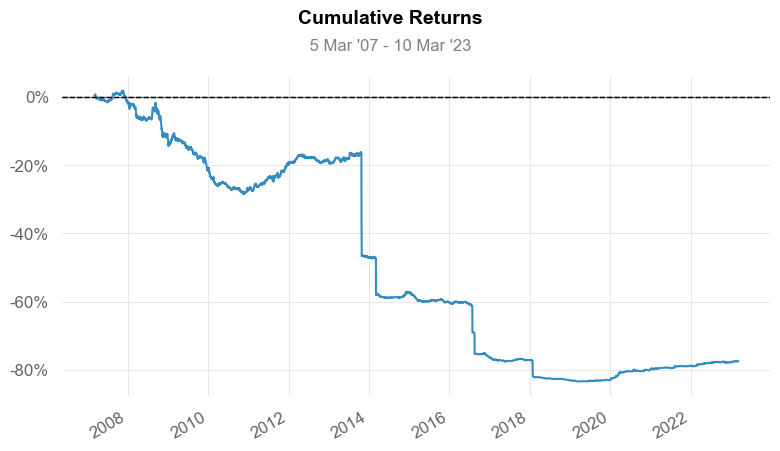

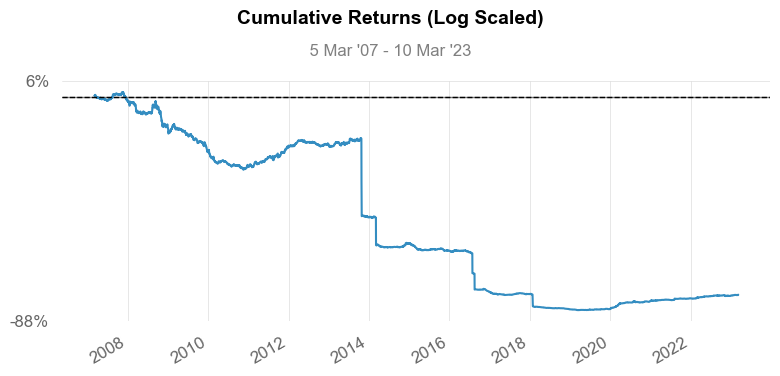

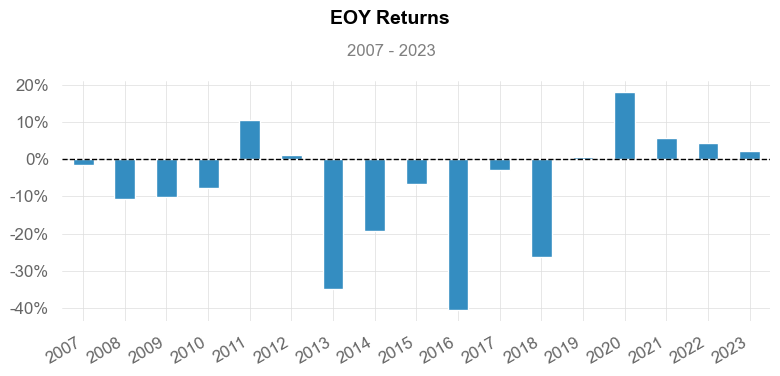

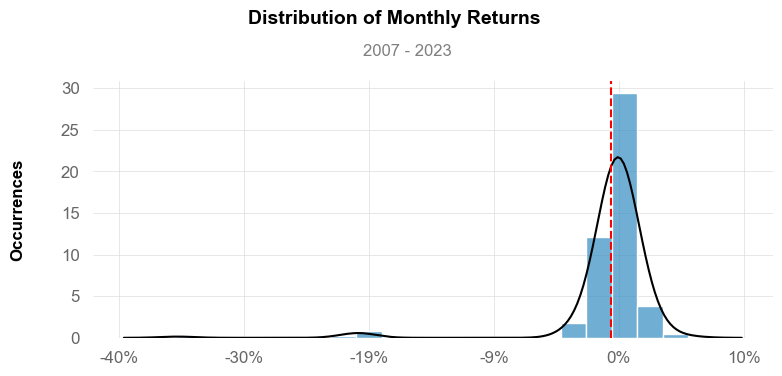

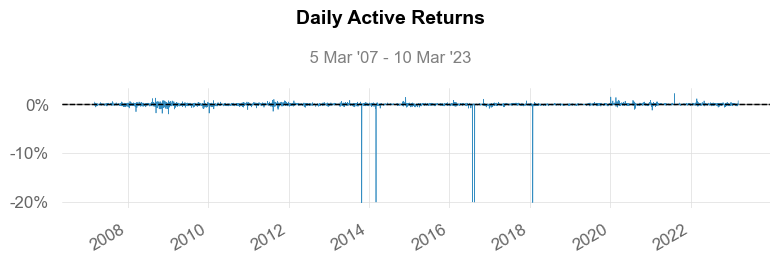

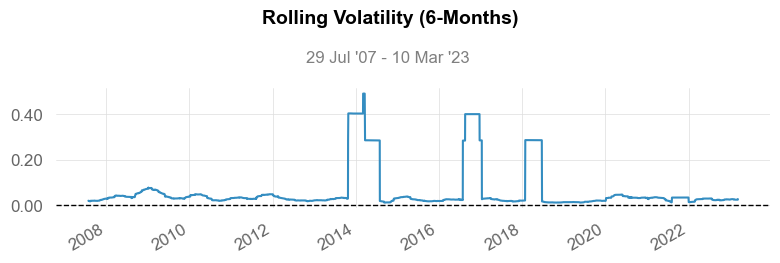

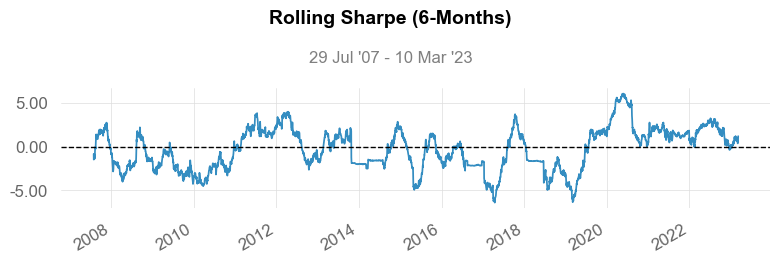

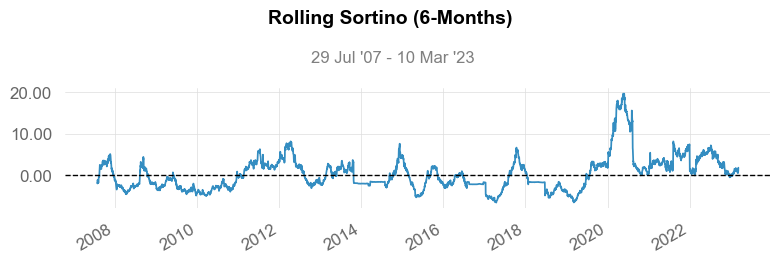

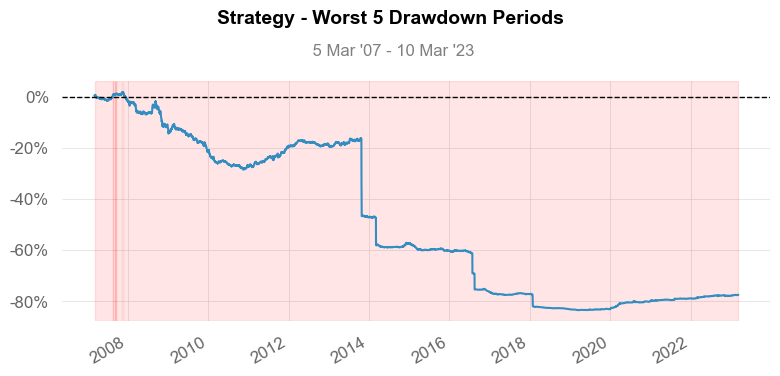

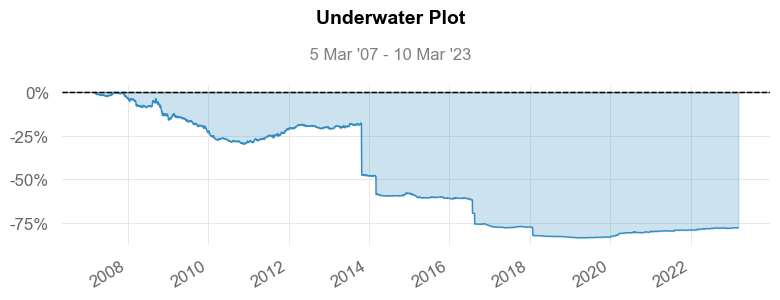

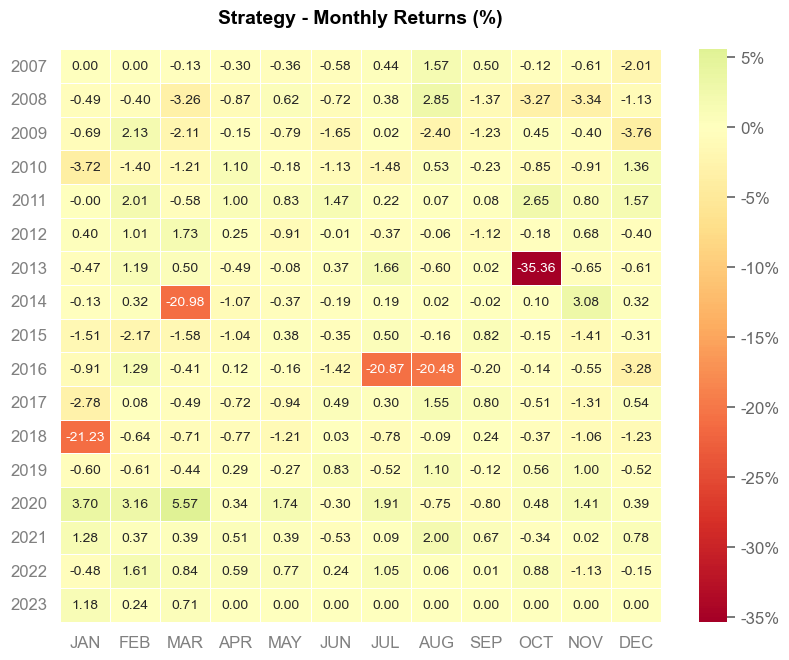

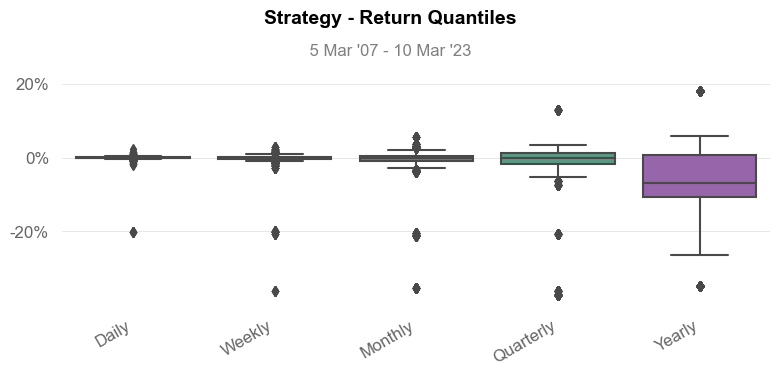

In [37]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [38]:
TF = 'M30'

In [39]:
data_1 = XAUUSD[TF]

In [40]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

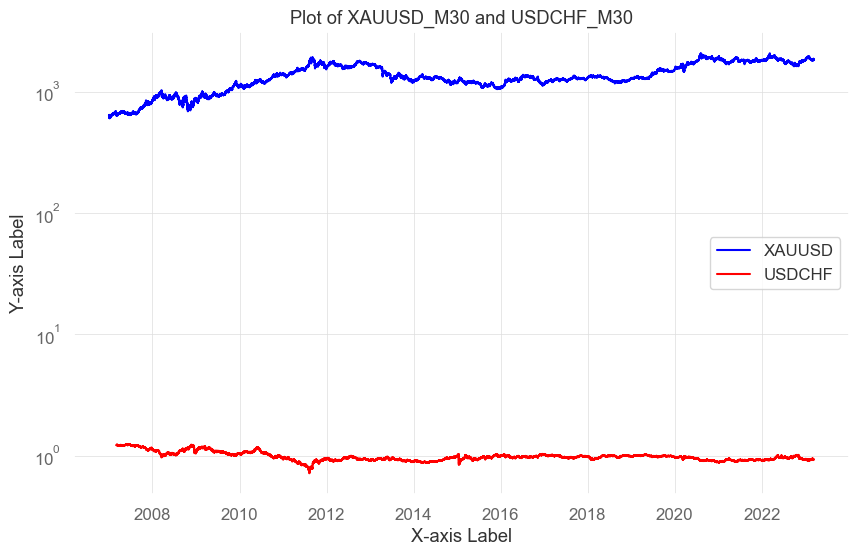

In [41]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [42]:
KF = Kalman_Filter(data_1, data_2)

In [43]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.001e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:03:06   Log-Likelihood:                     -1.4913e+06
No. Observations:              200000   AIC:                                  2.983e+06
Df Residuals:                  199999   BIC:                                  2.983e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.3810      0.949   1414.478      0.000    1340.521    1344.241
==============================================================================
Omnibus:                     6328.564   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6500.138
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       2.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result = KF.Run()

### Save Result Backtest 

In [45]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [46]:
filename = f'{Currency_Pair}_{TF}.csv'

In [47]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -75.73%
CAGR﹪                     -5.92%

Sharpe                     -0.52
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.45
Sortino                    -0.52
Smart Sortino              -0.45
Sortino/√2                 -0.37
Smart Sortino/√2           -0.32
Omega                      0.64

Max Drawdown               -79.65%
Longest DD Days            5268
Volatility (ann.)          12.1%
Calmar                     -0.07
Skew                       -25.53
Kurtosis                   670.06

Expected Daily %           -0.03%
Expected Monthly %         -0.73%
Expected Yearly %          -7.99%
Kelly Criterion            -28.17%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.28%
Expected Shortfall (cVaR)  -1.28%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-07,2018-02-11,2023-03-10,5268,-79.647227,-79.584867
2,2007-11-21,2008-06-15,2008-09-09,294,-3.975371,-3.894406
3,2008-09-11,2008-09-17,2008-10-05,25,-2.324707,-2.257865
4,2007-03-06,2007-04-23,2007-08-03,151,-1.315107,-1.214232
5,2007-08-30,2007-09-24,2007-10-08,40,-0.519840,-0.431182


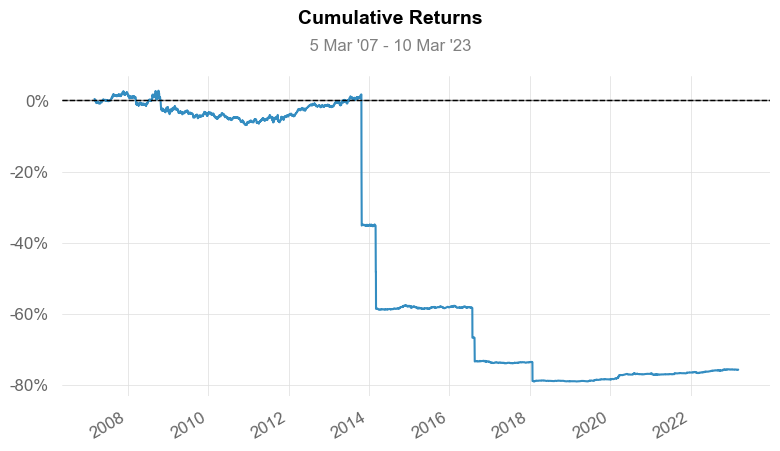

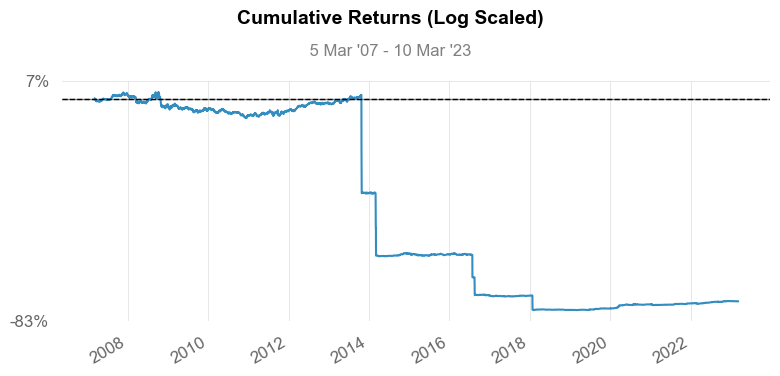

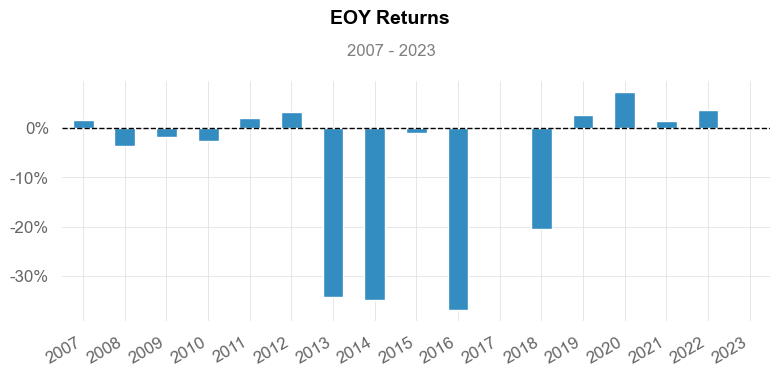

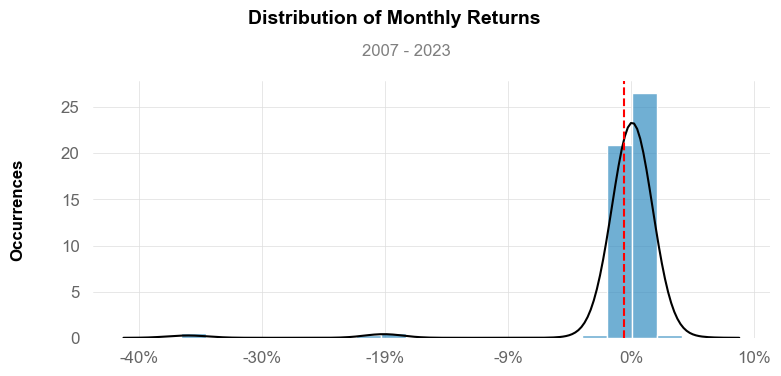

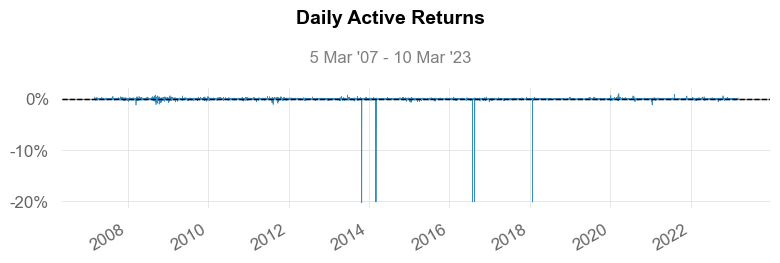

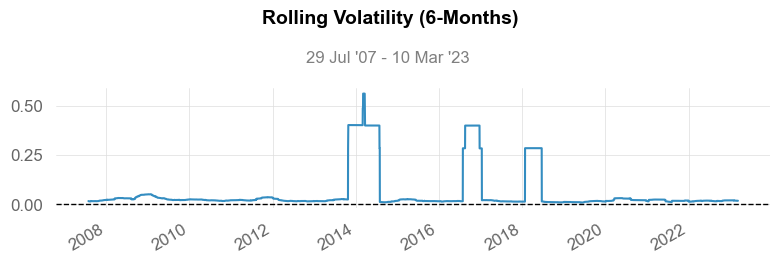

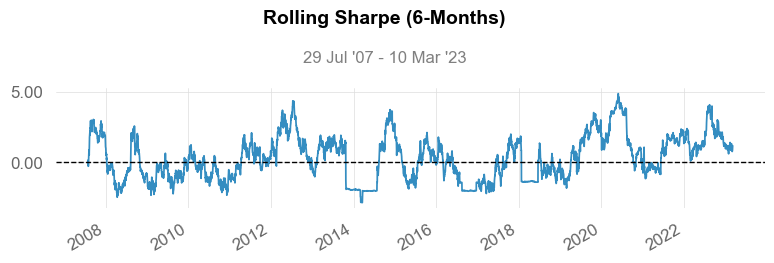

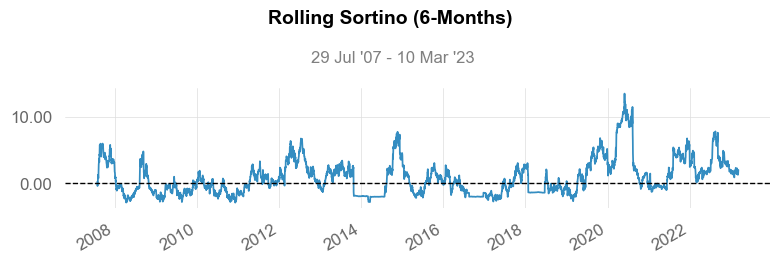

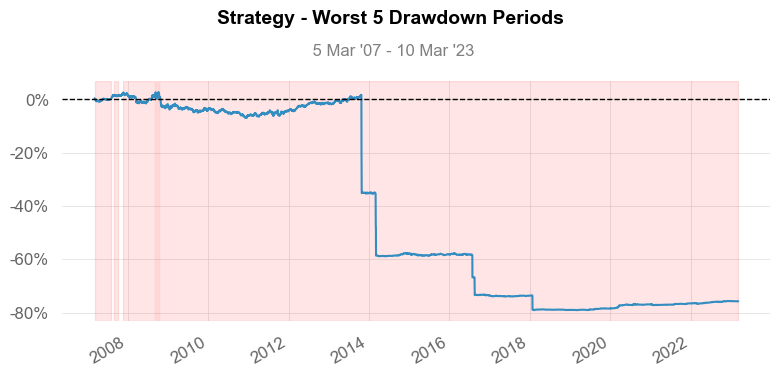

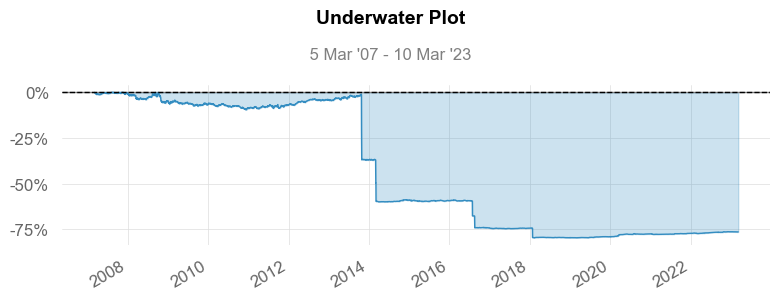

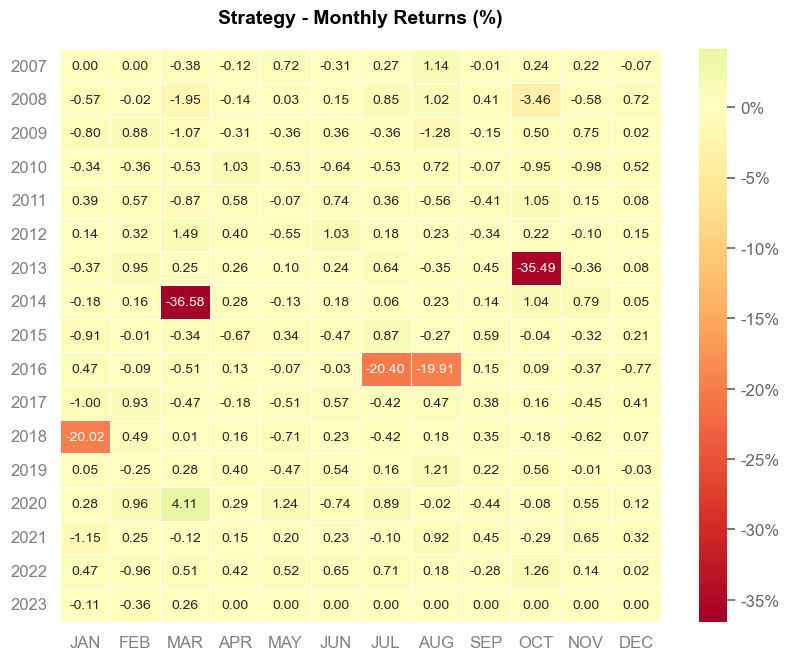

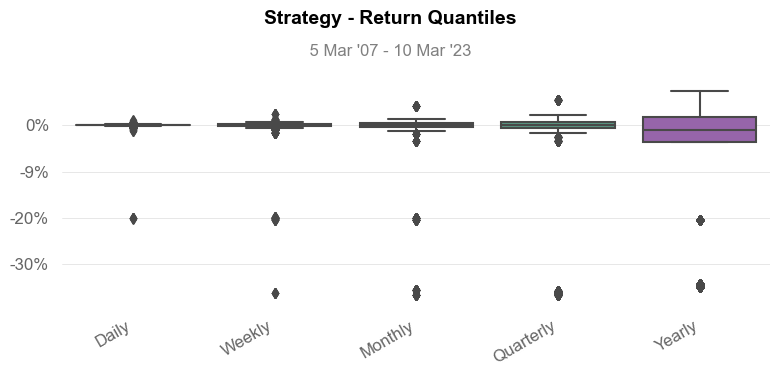

In [48]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())